<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Clase 3: Ecuaciones no lineales y EDOs

_¿Te acuerdas de todos esos esquemas numéricos para integrar ecuaciones diferenciales ordinarias? Es bueno saber que existen y qué peculiaridades tiene cada uno, pero en este curso no queremos implementar esos esquemas: queremos resolver las ecuaciones. Los problemas de evolución están por todas partes en ingeniería y son de los más divertidos de programar._

In [1]:
#Usaremos Arrays:


In [0]:
#Pintaremos cosas:



##Ecuaciones algebraicas

Como sabemos, las operaciones del álgebra lineal aparecen con mucha frecuencia a la hora de resolver sistemas de ecuaciones en derivadas parciales y en general al linealizar problemas de todo tipo, y suele ser necesario resolver sistemas con un número enorme de ecuaciones e incógnitas. Gracias a los arrays de NumPy podemos abordar este tipo de cálculos en Python, ya que todas las funciones están escritas en C o Fortran y tenemos la opción de usar bibliotecas optimizadas al límite.

El paquete de álgebra lineal en NumPy se llama `linalg`, así que importando NumPy con la convención habitual podemos acceder a él escribiendo `np.linalg`. Si imprimimos la ayuda del paquete vemos que tenemos funciones para:

* Funciones básicas (norma de un vector, inversa de una matriz, determinante, traza)
* Resolución de sistemas
* Autovalores y autovectores
* Descomposiciones matriciales (QR, SVD)
* Pseudoinversas

In [ ]:
help(np.linalg)

El producto matricial usual (no el que se hace elemento a elemento, sino el del álgebra lineal) se calcula con la misma función que el producto matriz-vector y el producto escalar vector-vector: con la función `dot`, que **no** está en el paquete `linalg` sino directamente en `numpy`.

Una consideración importante a tener en cuenta es que en NumPy no hace falta ser estricto a la hora de manejar vectores como si fueran matrices columna, siempre que la operación sea consistente. Un vector es una matriz con una sola dimensión: por eso si calculamos su traspuesta no funciona.

Juguemos un poco con ella para ver cómo funciona!

**Ejercicio:**
* Crear una matriz de 2x3, y otra matriz de 3x2
* Crear dos arrays de 3 elementos y otro de 2
* Multiplicar los arrays entre sí y observar el resultado

In [ ]:
A = 
B = 

v1 = 
v2 = 
v3 = 

print(A,'\n\n', B, '\n\n',v1, '\n\n',v2, '\n\n',v3)

In [ ]:
np.dot(A,B)

Existe también otra función muy interesante: np.linalg.solve
La usaremos para: 

**Resolver el siguiente sistema:**

$$ \begin{pmatrix} 2 & 0 & 1 \\ -1 & 1 & 0 \\ 3 & 2 & -1 \end{pmatrix}  \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} -1 \\ 3 \\ 0 \end{pmatrix} $$

In [ ]:
M =

M =

In [ ]:
x = np.??????(M, V)
x

**Cargar y guardar datos**

Numpy tiene dos funciones específicas para leer matrices y guardarlas: np.loadtxt y np.savetxt

In [ ]:
np.?????('array.txt', x, fmt='%.4e', header='Nuestro array')

In [ ]:
z = np.??????('array.txt')
z

## Ecuaciones no lineales

Visto cómo resolver sistemas de ecuaciones lineales, tal vez sea incluso más atractivo resolver ecuaciones no lineales. Para ello, importaremos el paquete `optimize` de SciPy:

La ayuda de este paquete es bastante larga (puedes consultarla también en http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). El paquete `optimize` incluye multitud de métodos para **optimización**, **ajuste de curvas** y **búsqueda de raíces**. Vamos a centrarnos ahora en la búsqueda de raíces de funciones escalares. Para más información puedes leer http://pybonacci.org/2012/10/25/como-resolver-ecuaciones-algebraicas-en-python-con-scipy/

<div class="alert alert-info">**Nota**: La función `root` se utiliza para hallar soluciones de *sistemas* de ecuaciones no lineales así que obviamente también funciona para ecuaciones escalares. No obstante, vamos a utilizar las funciones `brentq` y `newton` para que el método utilizado quede más claro.</div>

Hay básicamente dos tipos de algoritmos para hallar raíces de ecuaciones no lineales:

* Aquellos que operan en un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. Más lentos, convergencia asegurada.
* Aquellos que operan dando una condición inicial $x_0$ más o menos cerca de la solución. Más rápidos, convergencia condicionada.

De los primeros vamos a usar la función `brentq` (aunque podríamos usar `bisect`) y de los segundos vamos a usar `newton` (que en realidad engloba los métodos de Newton y de la secante).

**Ejemplo**:

$\ln{x} = \sin{x} \Rightarrow F(x) \equiv \ln{x} - \sin{x} = 0$

Lo primero que tengo que hacer es definir la ecuación, que matemáticamente será una función $F(x)$ que quiero igualar a cero.

Para hacernos una idea de las posibles soluciones siempre podemos representar gráficamente esa función:

Y utilizando por ejemplo el método de Brent en el intervalo $[0, 3]$:

<div class="alert alert-warning">¿No habíamos dicho que en Python no se puede dividir por cero? Observa esto:</div>

<div class="alert alert-warning">Si manejamos arrays de NumPy las operaciones siguen las reglas dadas en el estándar de punto flotante (IEEE 754). Las divisiones por cero resultan en infinito, 0 / 0 es NaN, etc. Podemos controlar si queremos warnings o errores con la función `np.seterr`.</div>

### Ejercicio

Obtener por ambos métodos (`newton` y `brentq`) una solución a la ecuación $\tan{x} = x$ distinta de $x = 0$. Visualizar el resultado.

### Argumentos extra

Nuestras funciones siempre tienen que tomar como primer argumento la incógnita, el valor que la hace cero. Si queremos incluir más, tendremos que usar el argumento `args` de la funciones de búsqueda de raíces. Este patrón se usa también en otras partes de SciPy, como ya veremos.

Vamos a resolver ahora una ecuación que depende de un parámetro:

$$\sqrt{x} + \log{x} = C$$.

**Nuestra incógnita sigue siendo $x$**, así que debe ir en primer lugar. El resto de parámetros van a continuación, y sus valores se especifican a la hora de resolver la ecuación usando `args`:

### Flujo compresible

Esta es la relación isentrópica entre el número de Mach $M(x)$ en un conducto de área $A(x)$:

$$ \frac{A(x)}{A^*} = \frac{1}{M(x)} \left( \frac{2}{1 + \gamma} \left( 1 + \frac{\gamma - 1}{2} M(x)^2 \right) \right)^{\frac{\gamma + 1}{2 (\gamma - 1)}}$$

Para un conducto convergente:

$$ \frac{A(x)}{A^*} = 3 - 2 x \quad x \in [0, 1]$$

Hallar el número de Mach en la sección $x = 0.9$.

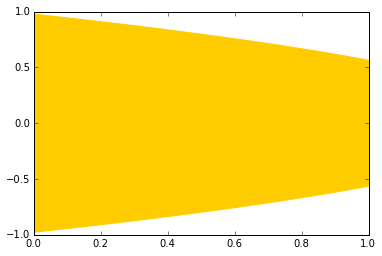

In [11]:
def A(x):
    return 3 - 2 * x

x = np.linspace(0, 1)
area = A(x)
r = np.sqrt(area / np.pi)
plt.fill_between(x, r, -r, color="#ffcc00")

¿Cuál es la función $F$ ahora? Hay dos opciones: definir una función $F_{0.9}(M)$ que me da el número de Mach en la sección $0.9$ o una función $F(M; x)$ con la que puedo hallar el número de Mach en cualquier sección. *Bonus points* si haces la segunda opción :)

Para resolver la ecuación utiliza el método de Brent (bisección). ¿En qué intervalo se encontrará la solución? ¡Si no te haces una idea es tan fácil como pintar la función $F$!

### Ecuación de Kepler

Representar la ecuación de Kepler

$$M = E - e \sin E$$

que relaciona dos parámetros geométricos de las órbitas elípticas, la anomalía media $M$ y la anomalía excéntrica $E$.

![Anomalías excéntrica y media](http://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Kepler%27s-equation-scheme.png/250px-Kepler%27s-equation-scheme.png)

para los siguientes valores de excentricidad:

* Tierra: $0.0167$
* Plutón: $0.249$
* Cometa Holmes: $0.432$
* 28P/Neujmin: $0.775$
* Cometa Halley: $0.967$

Para reproducir esta gráfica:

In [14]:
from IPython.display import HTML
HTML('<iframe src="http://en.m.wikipedia.org/wiki/Kepler%27s_equation" width="800" height="400"></iframe>')

Para ello utilizaremos el método de Newton (secante).

1- Define la función correspondiente a la ecuación de Kepler, que no solo es una ecuación implícita sino que además depende de un parámetro. ¿Cuál es la incógnita?

2- Como primer paso, resuélvela para la excentricidad terrerestre y anomalía media $M = 0.3$. ¿Qué valor escogerías como condición inicial?

3- Como siguiente paso, crea un dominio (`linspace`) de anomalías medias entre $0$ y $2 \pi$ y resuelve la ecuación de Kepler con excentricidad terrestre para todos esos valores. Fíjate que necesitarás un array donde almacenar las soluciones. Representa la curva resultante.

4- Como último paso, solo tienes que meter parte del código que ya has escrito en un bucle que cambie el valor de la excentricidad 5 veces. Es aconsejable que tengas todo ese código en una única celda (esta de aquí abajo).

Vamos a introducir aquí un truco muy útil en Python:

In [1]:
for ee in 0.0167, 0.249, 0.432, 0.775, 0.967:
    pass

# plt.legend(["Earth", "Pluto", "Comet Holmes", "28P/Neujmin", "Halley's Comet"], loc=2)

## Ecuaciones diferenciales ordinarias

Para integrar EDOs vamos a usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-error">**¡Importante!**: La función del sistema recibe como primer argumento $\mathbf{y}$ (un array) y como segundo argumento el instante $t$ (un escalar). Esta convención va exactamente al revés que en MATLAB y si se hace al revés obtendremos errores o, lo que es peor, resultados incorrectos.</div>

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos:

$$y' + y = 0$$

$$f(y, t) = \frac{dy}{dt} = -y$$

Condiciones iniciales:

Vector de tiempos donde realizamos la integración:

Integramos y representamos la solución:

### EDOs de orden superior

Tendremos que acordarnos ahora de cómo reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$

$$\mathbf{y} \leftarrow \pmatrix{y \\ y'}$$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

---

Clase en vídeo, parte del [Curso de Python para científicos e ingenieros](http://cacheme.org/curso-online-python-cientifico-ingenieros/) grabado en la Escuela Politécnica Superior de la Universidad de Alicante.

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("1R_JnTajrRY", width=560, height=315, list="PLGBbVX_WvN7bMwYe7wWV5TZt1a58jTggB")

---

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso-AeroPython-UC3M/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [2]:
%%html
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())